# Data Prep

## AI-Hub korean speech

In [1]:
import os,glob

In [2]:
data_root = '/home/data/kbh/dnn2/AVTR/Kspon'
target_list = [x for x in glob.glob(os.path.join(data_root, '*','*.pcm'))]

In [5]:
len(target_list)

9000

PCM 데이터이므로 wav로 변환해서 다루기 편하게 하자  
  
https://stackoverflow.com/questions/16111038/how-to-convert-pcm-files-to-wav-files-scripting  
  
https://docs.python.org/2/library/wave.html

```
Wave_write.setparams(tuple)
The tuple should be (nchannels, sampwidth, framerate, nframes, comptype, compname), with values valid for the set*() methods. Sets all parameters.
```


In [9]:
import os,glob 
import tqdm
import wave
import librosa

data_root = '/home/data/kbh/dnn2/AVTR/Kspon'
output_root = '/home/data/kbh/dnn2/AVTR/Kspon_WAV'

target_list = [x for x in glob.glob(os.path.join(data_root, '*','*.pcm'))]

ch = 1
samplebytes = 2
samplerates = 16000

def convert(idx):
    target_path = target_list[idx]

    target_name = target_path.split('/')[-1]
    target_name = target_name.split('.')[0]

    # read
    with open(target_path,'rb') as pcm :
        data = pcm.read()

    # save        
    with wave.open(output_root + '/' + target_name + '.wav','wb' ) as wav :
        wav.setparams((ch,samplebytes,samplerates, 0, 'NONE','NONE'))
        wav.writeframes(data)

convert(0)

trim 하려고 했는데 librosa에 PCM에서 바로 읽는 것이 안되서 WAV로 바꾼다음에 해야겠다.  
http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.effects.trim.html  


=> Kspon은 2인간의 대화를 녹음한 것이라. 한명이 쉼있이 계속해서 말하는 경우가 생겨서 가공소요가 큼

=> KoreaSpeech로 해보자 (한국인 음성 대화 데이터셋 https://aihub.or.kr/aidata/7968 현재 자료 없음)     

이건 너무 짧은게 많네. concat해서 가야하나. 

일단 공개된 데이터가 Kspon이니까 이걸 split이랑 trim 먹여서 가는게 옳은것 같다..?  

KsponSpeech_000003 이게 굉장히 split 이랑 trim 하기 좋은 데이터니까 이걸로 일단 try try

In [61]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

In [73]:
target_path = '/home/data/kbh/dnn2/AVTR/Kspon_WAV/KsponSpeech_001704.wav'

In [74]:
raw,_ = librosa.load(target_path,sr=16000)
print(np.shape(raw))
raw = raw/np.abs(np.max(raw))

(177728,)


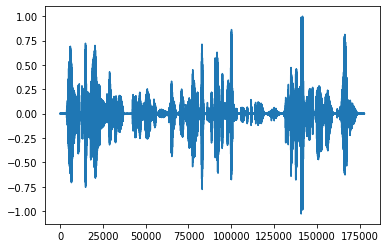

In [75]:
plt.plot(raw)
plt.show()

In [125]:
dB =  30
# 40 ms == 0.04 sec 
intervals = librosa.effects.split(raw, top_db=dB,frame_length=4048,hop_length=1024)
print(np.shape(intervals))
print(intervals)
m = 1000000
for i in intervals :
    d = i[1] - i[0]
    if m > d :
        m = d
print(m)

(4, 2)
[[  3072  38912]
 [ 40960 120832]
 [122880 128000]
 [130048 175104]]
5120


(160801,)


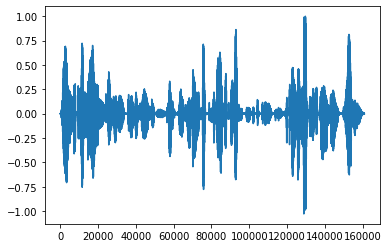

In [115]:
s = None
#s = np.zeros((0,1))
plt.figure()
for i in range(len(intervals)) : 
#    plt.figure()
#    plt.plot(raw[intervals[i,0]:intervals[i,1]])
    
     s = np.append(s,raw[intervals[i,0]:intervals[i,1]])
print(np.shape(s))
plt.plot(s)
plt.show()

In [58]:
sf.write('s_'+str(dB)+'dB.wav', s, 16000)

In [126]:
print(np.shape(s))

(160801,)
